In [1]:
import pandas as pd 
data=pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
data.shape


(53940, 11)

## preprocessing

In [3]:
data.isnull().sum()


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

## Data Clearing


In [4]:
data = data.drop(["cut","color","clarity"],axis=1)

In [5]:
data.head()

,Unnamed: 0,carat,depth,table,price,x,y,z
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75


## Data Analysis


In [6]:
import matplotlib.pyplot as plt
import  seaborn as sns 

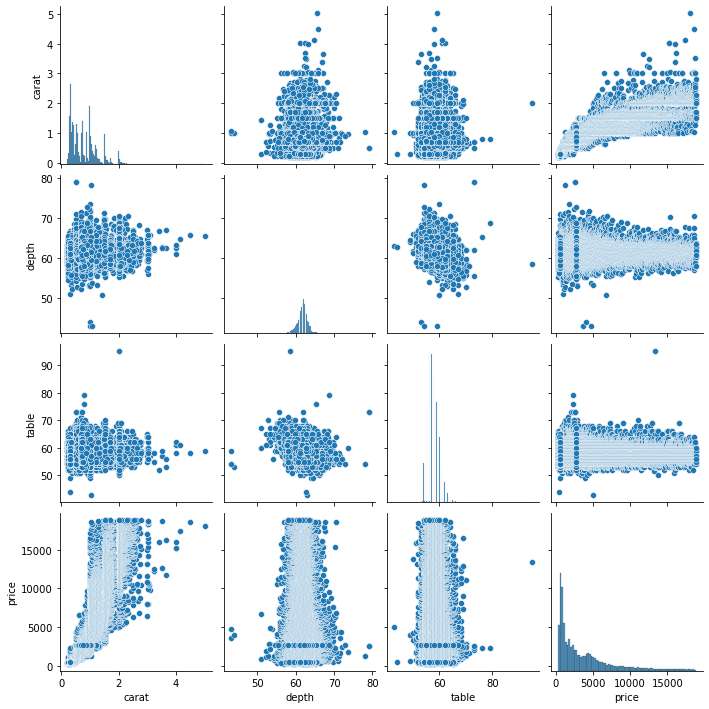

In [7]:
sns.pairplot(data[["carat","depth","table","price"]])
plt.show()

## Train and Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x= data[["carat","depth","table"]]
y= data["price"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

 ## Cleaning Charts

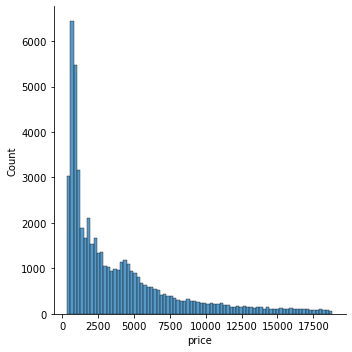

In [22]:
sns.displot(data["price"])

In [24]:
q= data["price"].quantile(0.99)
q
## don't need to clear

17378.22

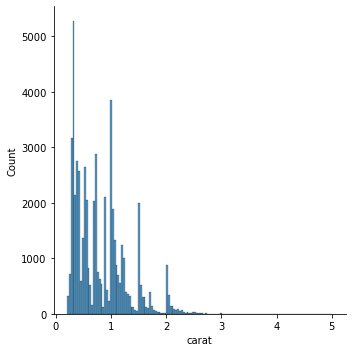

In [25]:
sns.displot(data["carat"])

In [26]:
q= data["carat"].quantile(0.99)
q

2.18

In [27]:
data=data[data["carat"]<q]

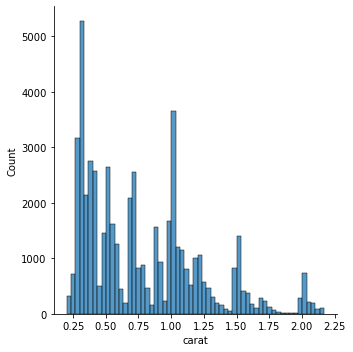

In [29]:
sns.displot(data["carat"])

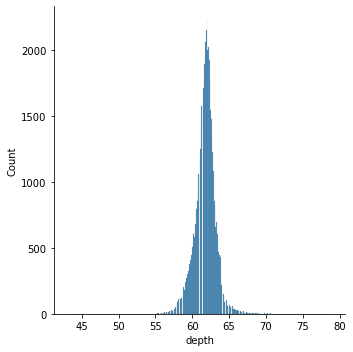

In [30]:
sns.displot(data["depth"])

In [31]:
q= data["depth"].quantile(0.99)
q

65.5

In [34]:
qq= data["depth"].quantile(0.01)
qq

52.104

In [33]:
data=data[data["depth"]<q]

In [35]:
data=data[data["depth"]>qq]

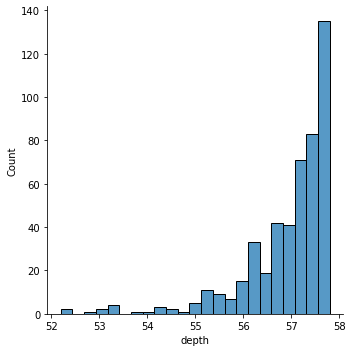

In [36]:
sns.displot(data["depth"])

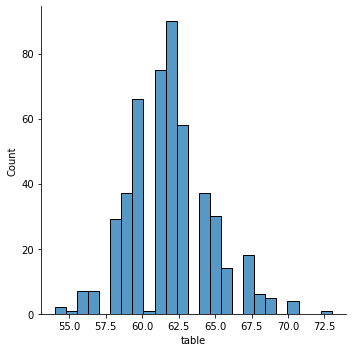

In [38]:
sns.displot(data["table"])
##noo need

## Create The Model

## Linerity

Text(0.5, 1.0, 'Table Vs Price')

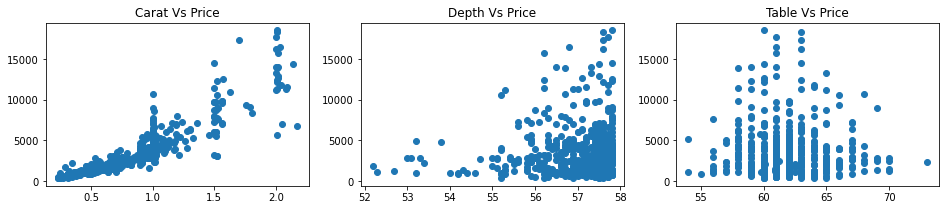

In [39]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,3))
ax1.scatter(data["carat"],data["price"])
ax1.set_title("Carat Vs Price")
ax2.scatter(data["depth"],data["price"])
ax2.set_title("Depth Vs Price")
ax3.scatter(data["table"],data["price"])
ax3.set_title("Table Vs Price")

In [40]:
import numpy as np

In [41]:
data["log_price"]=np.log(data["price"])

In [42]:
data.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,log_price
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,5.789960
91,92,0.86,55.1,69.0,2757,6.45,6.33,3.52,7.921898
95,96,0.70,57.5,58.0,2759,5.85,5.90,3.38,7.922624
190,191,0.71,57.8,60.0,2777,5.87,5.90,3.40,7.929126
219,220,0.53,57.5,64.0,2782,5.34,5.37,3.08,7.930925


Text(0.5, 1.0, 'Table Vs Price')

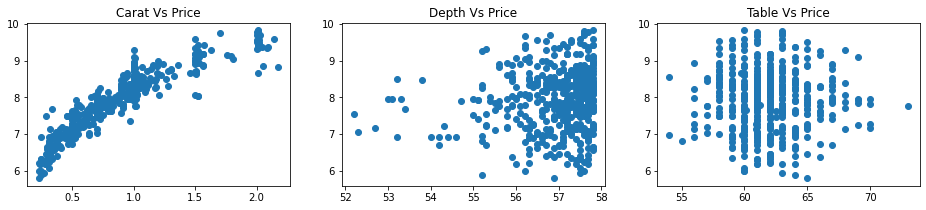

In [43]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,3))
ax1.scatter(data["carat"],data["log_price"])
ax1.set_title("Carat Vs Price")
ax2.scatter(data["depth"],data["log_price"])
ax2.set_title("Depth Vs Price")
ax3.scatter(data["table"],data["log_price"])
ax3.set_title("Table Vs Price")

In [46]:
new_data=data.drop(["price"],axis=1)
new_data

,Unnamed: 0,carat,depth,table,x,y,z,log_price
2,3,0.23,56.9,65.0,4.05,4.07,2.31,5.789960
91,92,0.86,55.1,69.0,6.45,6.33,3.52,7.921898
95,96,0.70,57.5,58.0,5.85,5.90,3.38,7.922624
190,191,0.71,57.8,60.0,5.87,5.90,3.40,7.929126
219,220,0.53,57.5,64.0,5.34,5.37,3.08,7.930925
...,...,...,...,...,...,...,...,...
53542,53543,0.78,54.7,67.0,6.25,6.15,3.40,7.897668
53660,53661,0.71,57.3,67.0,5.96,5.76,3.36,7.903596
53756,53757,0.84,55.6,64.0,6.42,6.32,3.54,7.909857
53757,53758,0.72,55.4,64.0,6.06,5.97,3.34,7.909857
